Importing

In [34]:
import os
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd
import tarfile

from torchvision.datasets.folder import default_loader
from torchvision.datasets.utils import download_url

root = '../data/cub/'
ilename = 'CUB_200_2011.tgz'



Download and extract CUB

In [18]:

# url = 'https://data.caltech.edu/records/65de6-vp158/files/CUB_200_2011.tgz'
# download_url(url, root, img_filename)

# with tarfile.open(os.path.join(root, img_filename), "r:gz") as tar:
#     tar.extractall(path=root)


Using downloaded and verified file: ../data/cub/CUB_200_2011.tgz


Load files and labels

In [35]:
path = os.path.join(root,'CUB_200_2011')
imagepath = os.path.join(path,'images')

images = pd.read_csv(os.path.join(path,'images.txt'), delimiter=' ', names=['img_id', 'image_path'])
labels = pd.read_csv(os.path.join(path,'image_class_labels.txt'), delimiter=' ', names=['img_id', 'target'])
labels = labels.iloc[:,1].tolist()
images = images.iloc[:,1].tolist()

data = []
for X, y in zip(images, labels):
    data.append([X,y])

View class distributions

(array([  1.,   1.,   1.,   1.,   5.,   2.,   3.,   3.,   8., 175.]),
 array([41. , 42.9, 44.8, 46.7, 48.6, 50.5, 52.4, 54.3, 56.2, 58.1, 60. ]),
 <BarContainer object of 10 artists>)

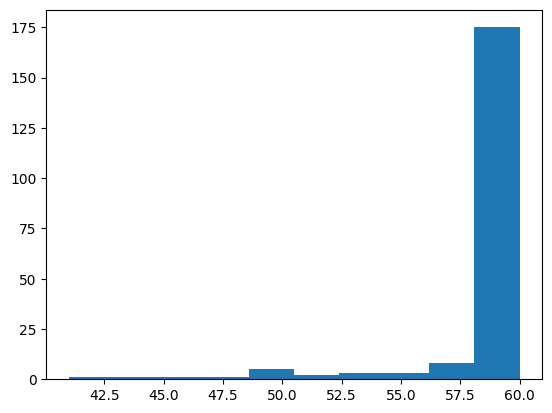

In [42]:
class_distribution = dict()
for i in labels:
    if i in class_distribution:
        class_distribution[i] += 1
    else:
        class_distribution[i] = 1

num_classes = len(class_distribution.keys())
plt.hist(class_distribution.values())

Making in-out split

In [55]:
out_number = 40 #40 classes out-of-set

out_classes = list(range(num_classes-out_number+1,num_classes+1))

test_unknown = []
in_set = []

for X, y in data:
    if y in out_classes:
        test_unknown.append([X,y])
    else: 
        in_set.append([X,y])


Making train/val/test split

In [61]:
split = [0.1, 0.2] # fractional size of val:test splits
random.shuffle(in_set)

val, test_known, train = (np.split(in_set, [int(split[0]*len(in_set)), int((split[0]+ split[1])*len(in_set))] ))

In [63]:
len(val) + len(test_known) + len(train) == len(in_set)

True

Export all as csv

In [64]:
np.savetxt(os.path.join(root,"train.csv"), 
           train,
           delimiter =", ", 
           fmt ='% s')

np.savetxt(os.path.join(root,"test_known.csv"), 
           test_known,
           delimiter =", ", 
           fmt ='% s')

np.savetxt(os.path.join(root,"test_unknown.csv"), 
           test_unknown,
           delimiter =", ", 
           fmt ='% s')

np.savetxt(os.path.join(root,"val.csv"), 
           val,
           delimiter =", ", 
           fmt ='% s')
